In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os




In [194]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Data/Dataframelimpa_sem_latlong.csv")

In [195]:
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'

df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0000,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0000,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0000,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0000,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0000,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64873,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0000,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14
64874,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,0

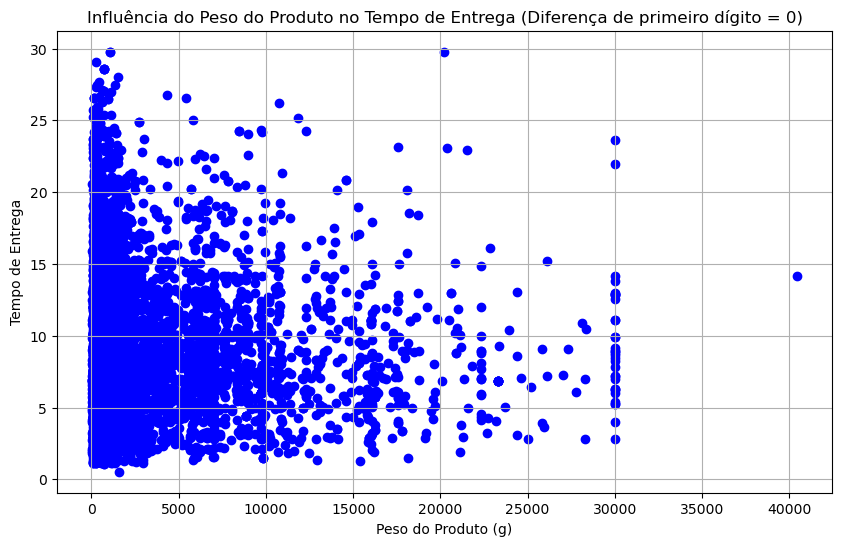

In [196]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero
df_filtered = df[df['seller_first_digit'] - df['customer_first_digit'] == 0]

# Plotando um gráfico para mostrar como o product_weight_g influencia no delivery_time
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_weight_g'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Peso do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0)')
plt.grid(True)
plt.show()

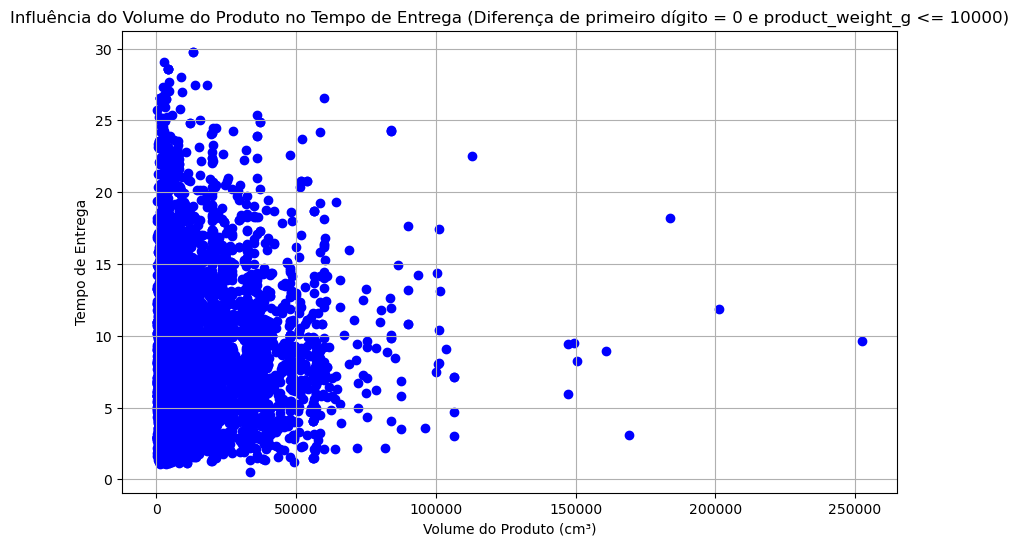

In [197]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Calculando o volume do produto em cm³
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero e o preço do produto é <= 1000
df_filtered = df[(df['seller_first_digit'] - df['customer_first_digit'] == 0) & (df['product_weight_g'] <= 10000)]

# Plotando um gráfico para mostrar como o volume do produto influencia no tempo de entrega
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_volume_cm3'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Volume do Produto (cm³)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Volume do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0 e product_weight_g <= 10000)')
plt.grid(True)
plt.show()

In [198]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value,seller_first_digit,customer_first_digit,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0000,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29,2,2,3528.0
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0000,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87,3,3,14157.0
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0000,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69,1,3,2880.0
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0000,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85,0,1,2700.0
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0000,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65,0,1,5760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64873,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0000,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14,1,5,8000.0
64874,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22

Pedido em aprovação
Separando o pedido
Pedido em transporte
product_weight_g	
product_length_cm	
product_height_cm	
product_width_cm
payment_sequential (o que é isso?)
payment_installments(parcelas)
payment_value
product_volume_cm3


product_category_name
payment_type




target: delivery_time


In [199]:
""" colunas=["Pedido em aprovação","Separando o pedido","Pedido em transporte","product_weight_g",	
"product_length_cm"	,
"product_height_cm"	,
"product_width_cm",
"payment_sequential",
"payment_installments",
"payment_value",
"product_volume_cm3",
"product_category_name",
"payment_type",
'delivery_time'] """

colunas=colunas=["Pedido em aprovação","Separando o pedido","Pedido em transporte","product_weight_g",	
"product_length_cm"	,
"product_height_cm"	,
"product_width_cm",
"payment_sequential",
"payment_installments",
"payment_value",
"product_volume_cm3",
"payment_type",
'delivery_time']

df_analise=df[colunas]
df_analise


,Pedido em aprovação,Separando o pedido,Pedido em transporte,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,product_volume_cm3,payment_type,delivery_time
0,0.03,6.37,1.21,650.0,28.0,9.0,14.0,1.0,2.0,72.19,3528.0,credit_card,7.61
1,0.01,1.91,6.03,3050.0,33.0,13.0,33.0,1.0,5.0,216.87,14157.0,credit_card,7.95
2,1.26,0.30,5.11,450.0,24.0,8.0,15.0,1.0,1.0,34.59,2880.0,boleto,6.67
3,0.01,1.54,6.87,200.0,27.0,5.0,20.0,1.0,1.0,31.75,2700.0,credit_card,8.42
4,1.00,7.25,1.74,2000.0,30.0,12.0,16.0,1.0,3.0,157.60,5760.0,credit_card,9.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64873,0.01,4.29,16.61,175.0,20.0,20.0,20.0,1.0,4.0,456.28,8000.0,credit_card,20.91
64874,0.05,3.52,1.15,750.0,30.0,30.0,11.0,1.0,1.0,101.73,9900.0,credit_card,4.72
64875,0.04,2.06,18.98,2700.0,60.0,15.0,15.0,1.0,7.0,273.92,13500.0,credit_card,21.08
64876,1.00,1.92,1.88,967.0,21.0,24.0,19.0,1.0,3.0,116.85,9576.0,credit_card,4.80


In [200]:
df_dummies=pd.get_dummies(df_analise)
matriz=df_dummies.corr()
matriz

,Pedido em aprovação,Separando o pedido,Pedido em transporte,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,product_volume_cm3,delivery_time,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
Pedido em aprovação,1.000000,-0.004511,0.016397,0.019199,-0.004021,0.008578,-0.001477,-0.012127,-0.141252,0.072693,0.016237,0.080059,0.621691,-0.512192,-0.000323,-0.031358
Separando o pedido,-0.004511,1.000000,0.009753,0.059336,0.050810,0.054610,0.056556,0.009076,0.017684,0.028367,0.069258,0.328585,-0.004951,0.002360,0.001107,0.002749
Pedido em transporte,0.016397,0.009753,1.000000,0.022341,0.034284,0.000359,0.016936,-0.012917,0.049842,0.039958,0.007792,0.945321,0.002609,0.003354,-0.011835,-0.004492
product_weight_g,0.019199,0.059336,0.022341,1.000000,0.423785,0.549827,0.498825,0.021867,0.181440,0.327618,0.778094,0.041254,-0.022687,0.021527,-0.018226,0.004219
product_length_cm,-0.004021,0.050810,0.034284,0.423785,1.000000,0.147479,0.527065,0.031812,0.121705,0.137208,0.524667,0.048239,-0.021748,0.012011,-0.009155,0.015363
product_height_cm,0.008578,0.054610,0.000359,0.549827,0.147479,1.000000,0.279856,0.010530,0.115856,0.225107,0.713374,0.018359,-0.018163,0.021575,-0.015562,-0.003727
product_width_cm,-0.001477,0.056556,0.016936,0.498825,0.527065,0.279856,1.000000,0.034788,0.152004,0.173399,0.633064,0.033916,-0.027648,0.018333,-0.013487,0.015024
payment_sequential,-0.012127,0.009076,-0.012917,0.021867,0.031812,0.010530,0.034788,1.000000,-0.097411,-0.080934,0.034162,-0.010052,-0.055621,-0.259693,-0.010770,0.537581
payment_installments,-0.141252,0.017684,0.049842,0.181440,0.121705,0.115856,0.152004,-0.097411,1.000000,0.337543,0.157668,0.043215,-0.293865,0.374396,-0.075713,-0.181433
payment_value,0.072693,0.028367,0.039958,0.327618,0.137208,0.225107,0.173399,-0.080934,0.337543,1.000000,0.283895,0.051477,0.000154,0.072715,-0.023502,-0.116080


<Axes: >

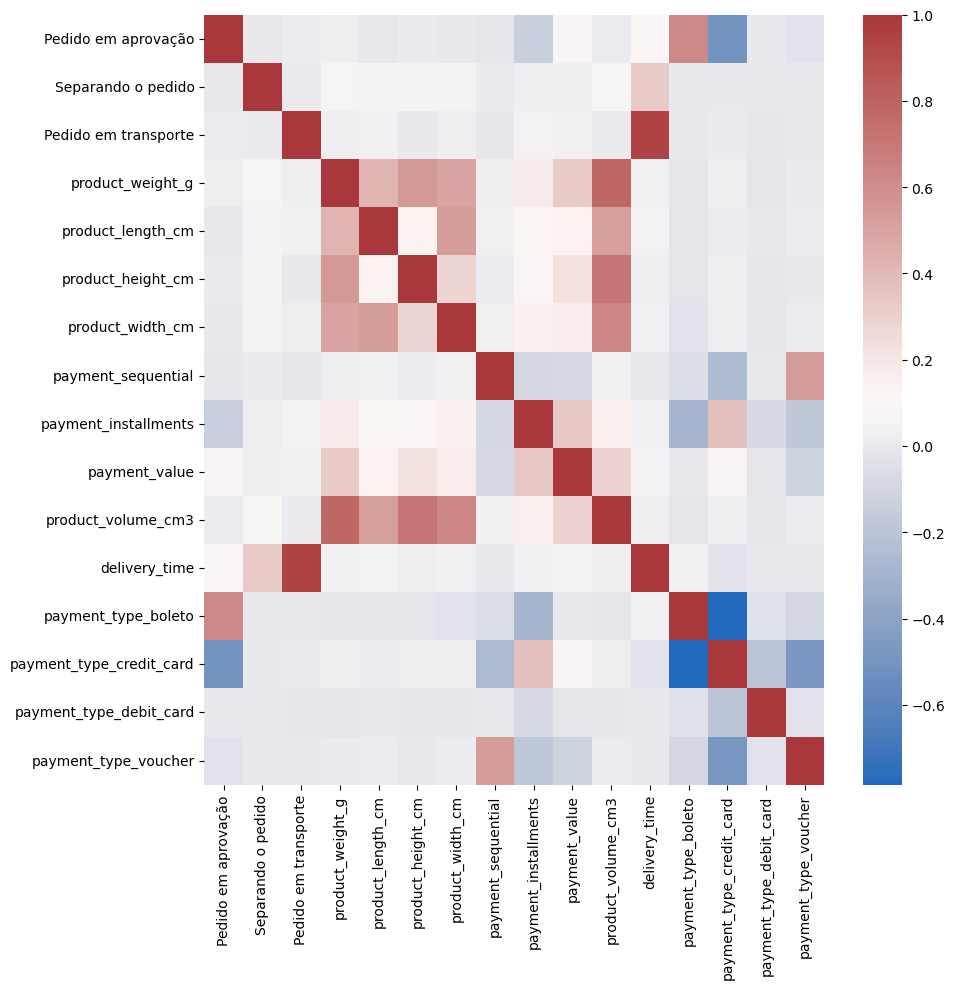

In [201]:
plt.figure(figsize=(10,10))
sns.heatmap(data=matriz,cmap="vlag")


In [202]:
matriz["delivery_time"].sort_values(ascending=False)

delivery_time               1.000000
Pedido em transporte        0.945321
Separando o pedido          0.328585
Pedido em aprovação         0.080059
payment_value               0.051477
product_length_cm           0.048239
payment_installments        0.043215
payment_type_boleto         0.041959
product_weight_g            0.041254
product_width_cm            0.033916
product_volume_cm3          0.030542
product_height_cm           0.018359
payment_type_voucher       -0.005416
payment_sequential         -0.010052
payment_type_debit_card    -0.010795
payment_type_credit_card   -0.029945
Name: delivery_time, dtype: float64

Analisando algumas relações entre as variáveis (colunas)

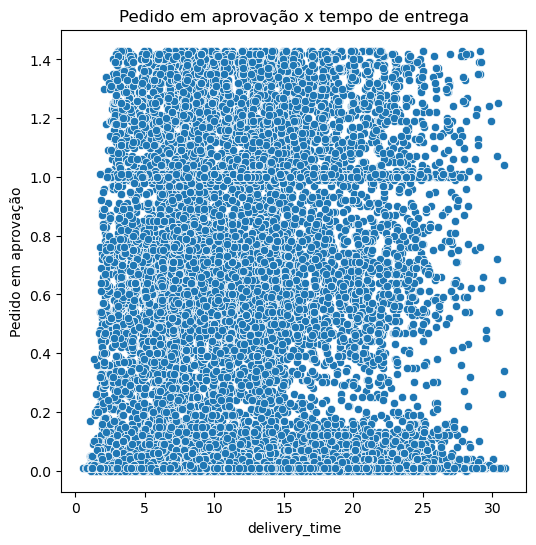

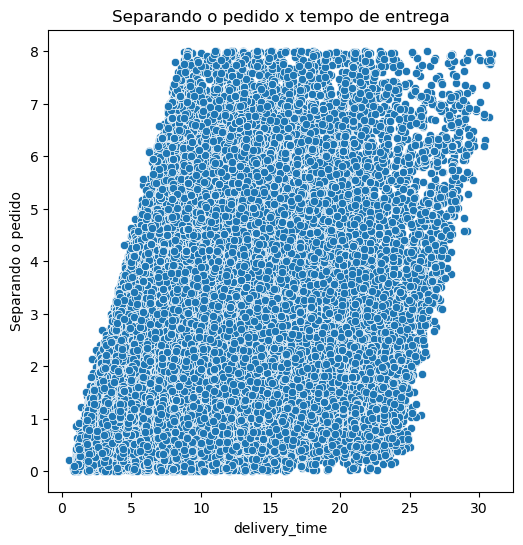

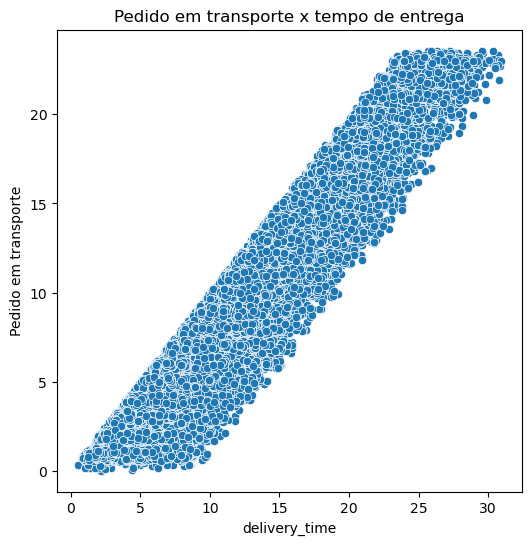

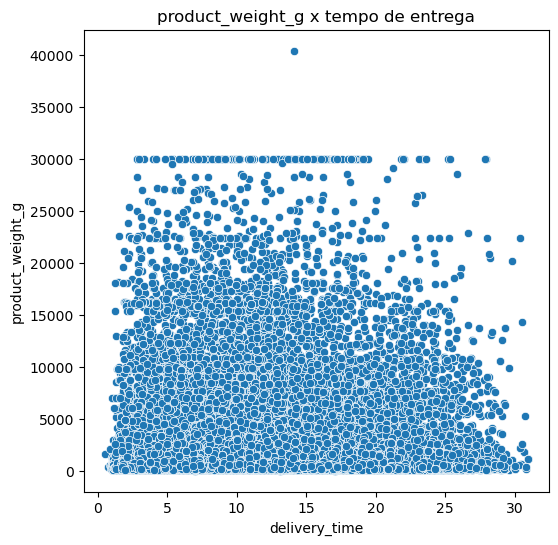

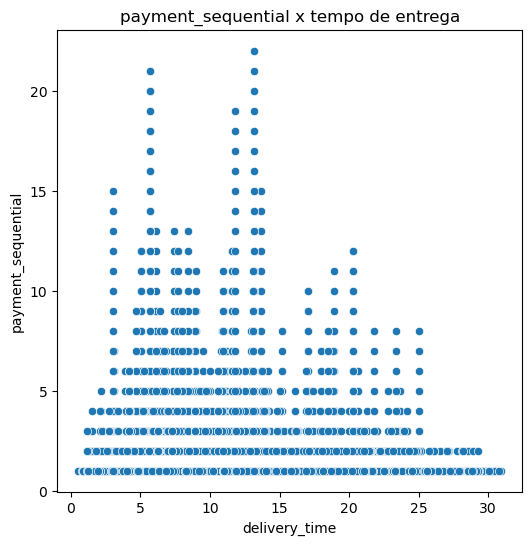

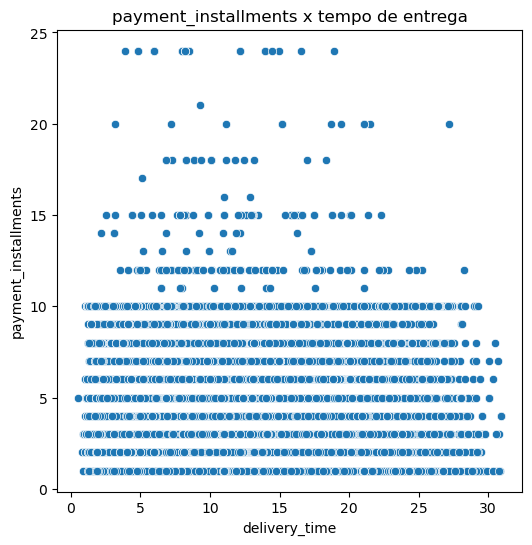

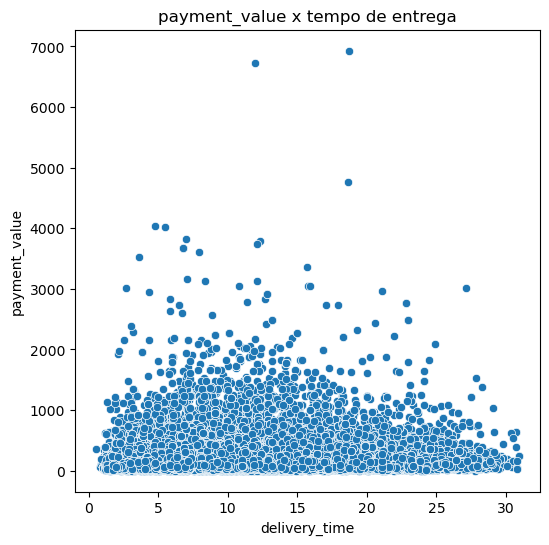

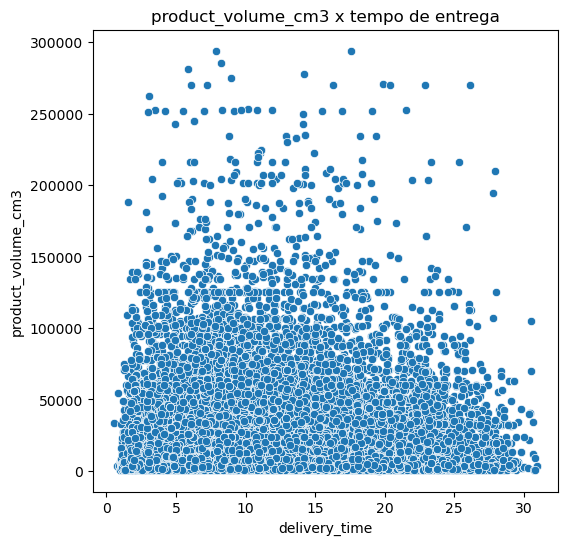

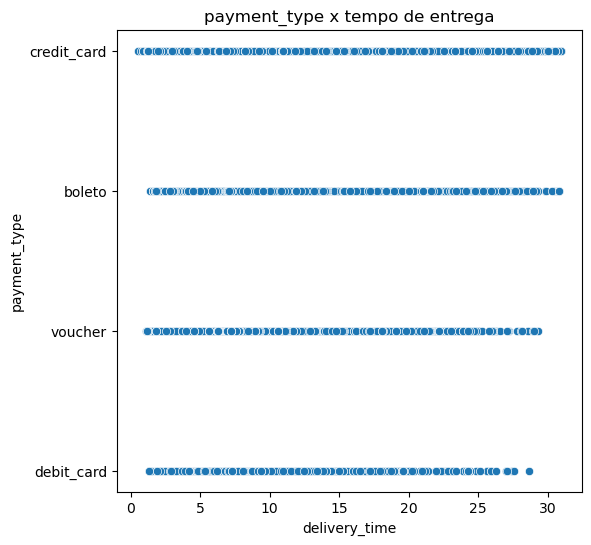

In [203]:
for coluna in df_analise.columns:
    nao_pegar=["delivery_time","product_length_cm","product_height_cm","product_width_cm"]
    if coluna not in nao_pegar:
        plt.figure(figsize=(6,6))
        sns.scatterplot(data=df_analise,x="delivery_time",y=coluna,)
        plt.title(f"{coluna} x tempo de entrega")

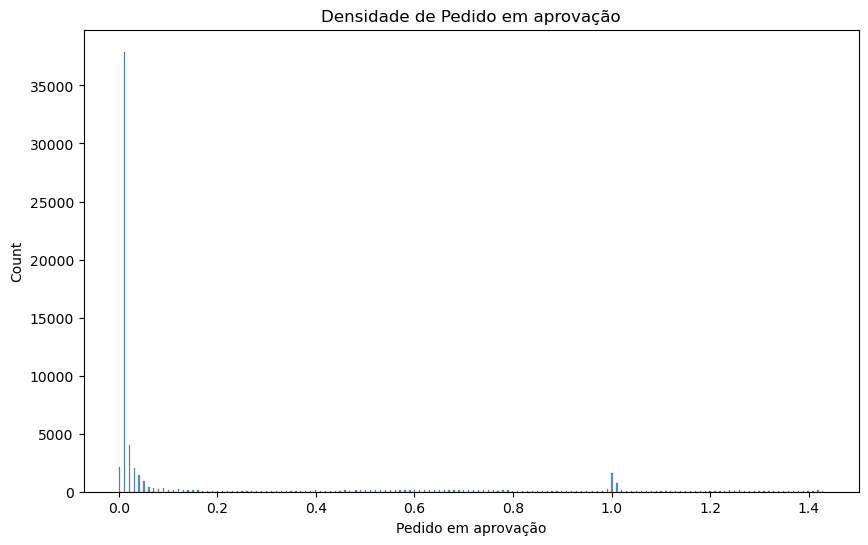

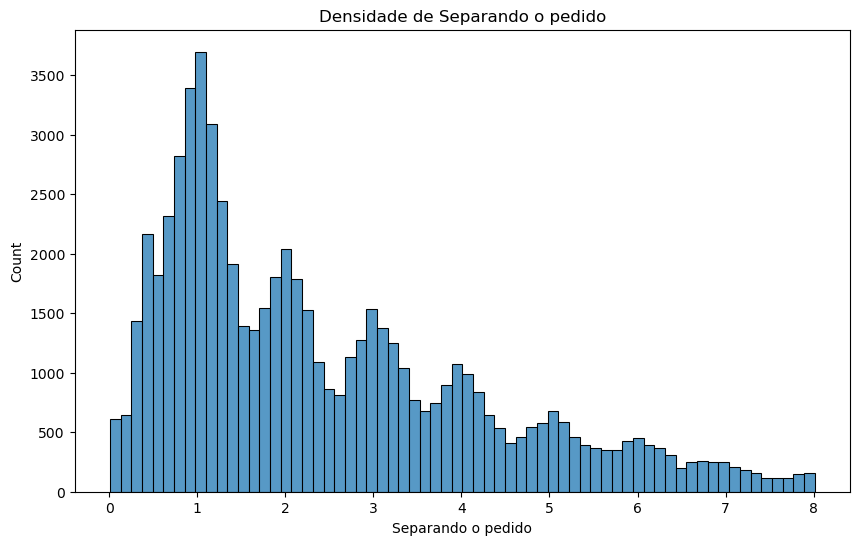

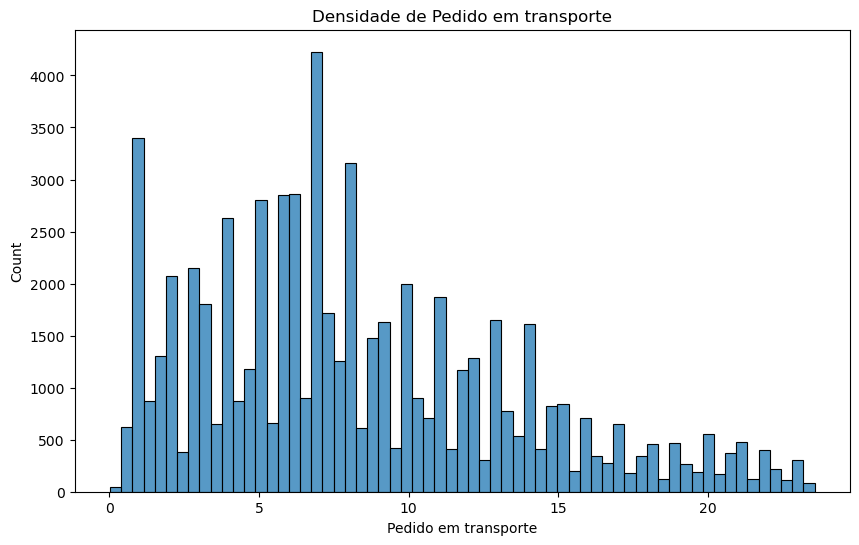

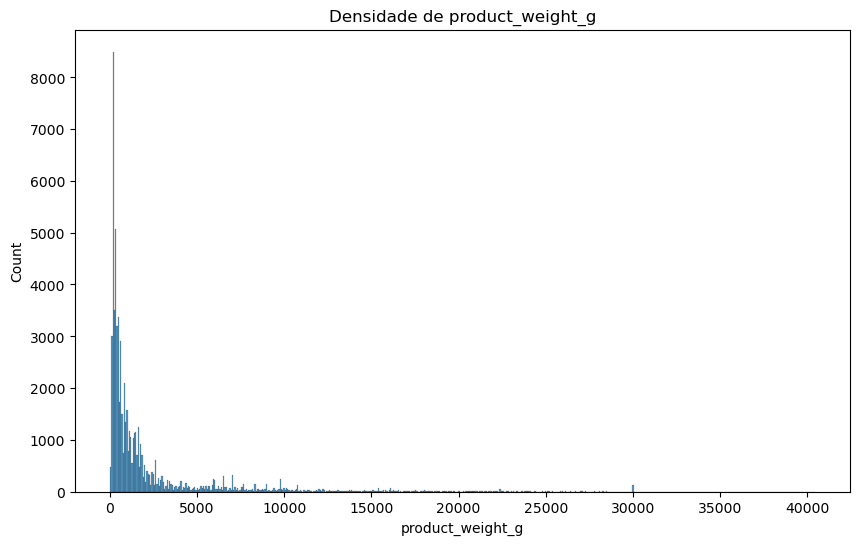

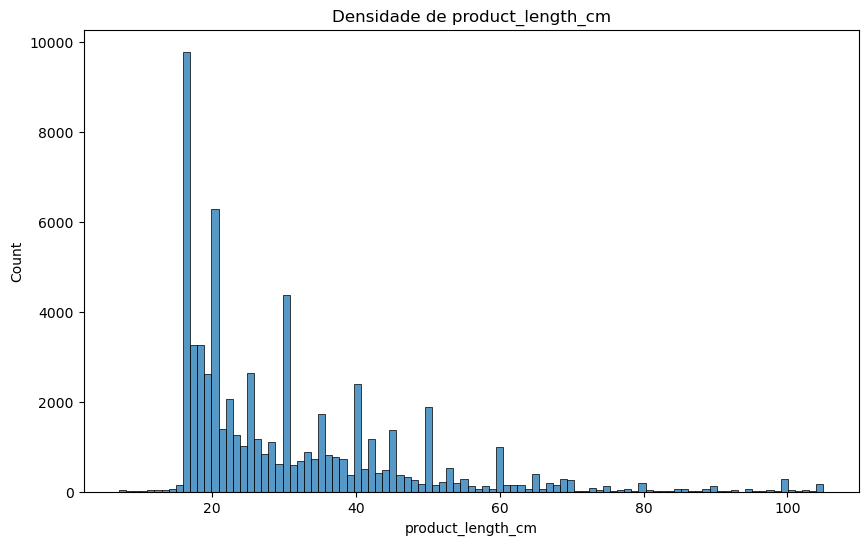

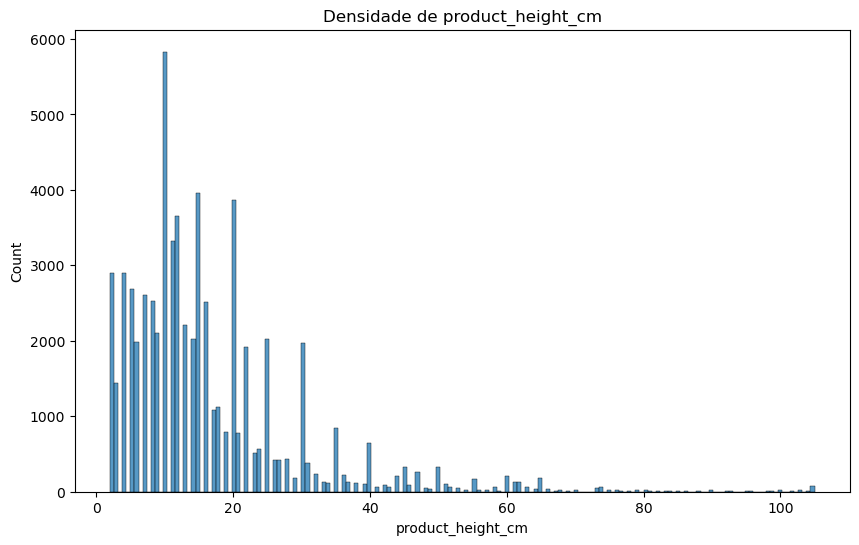

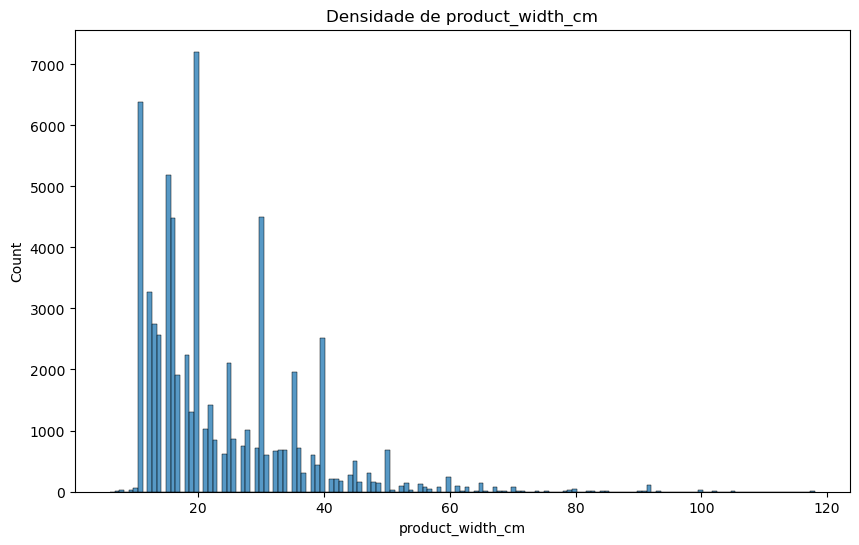

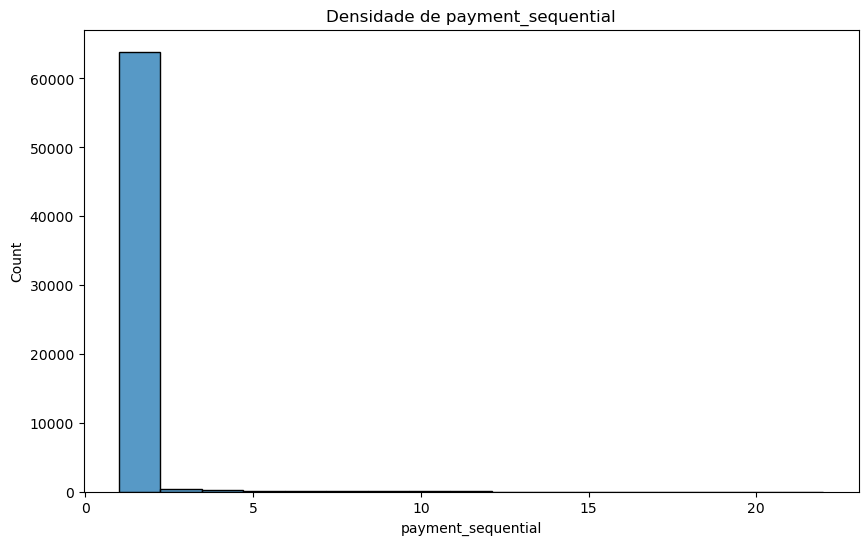

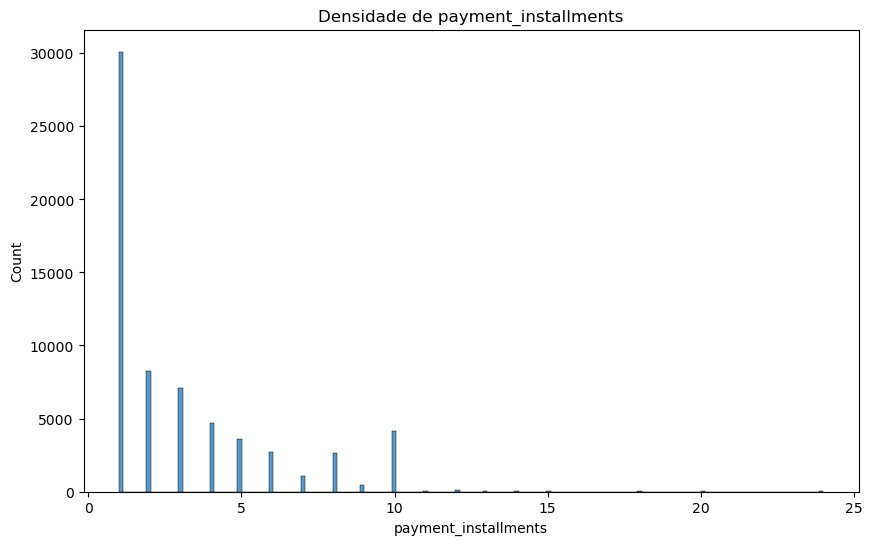

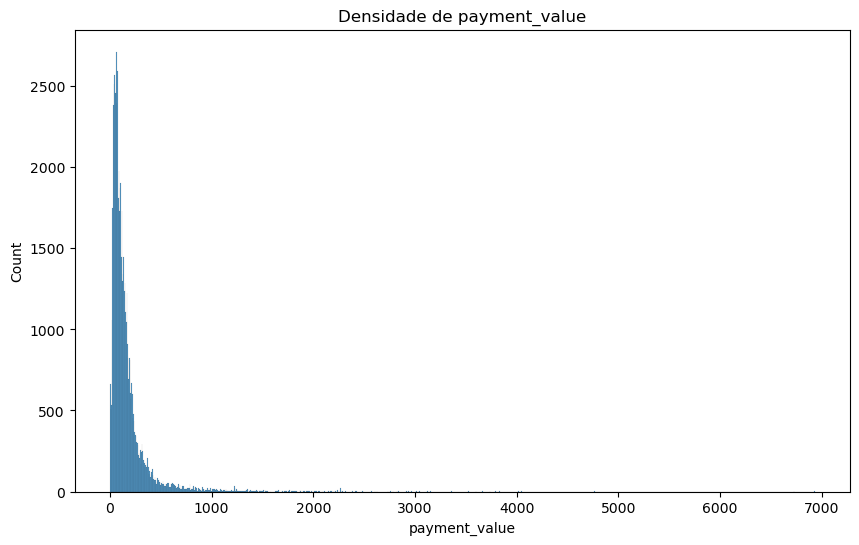

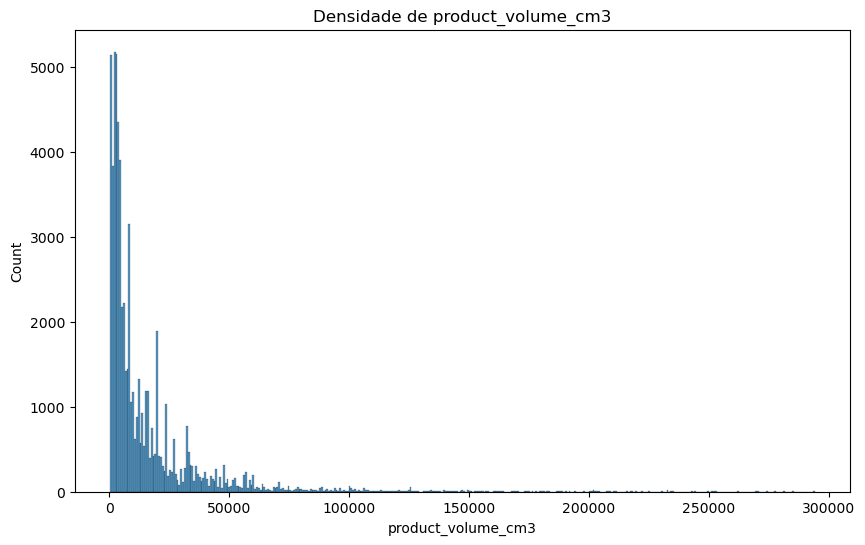

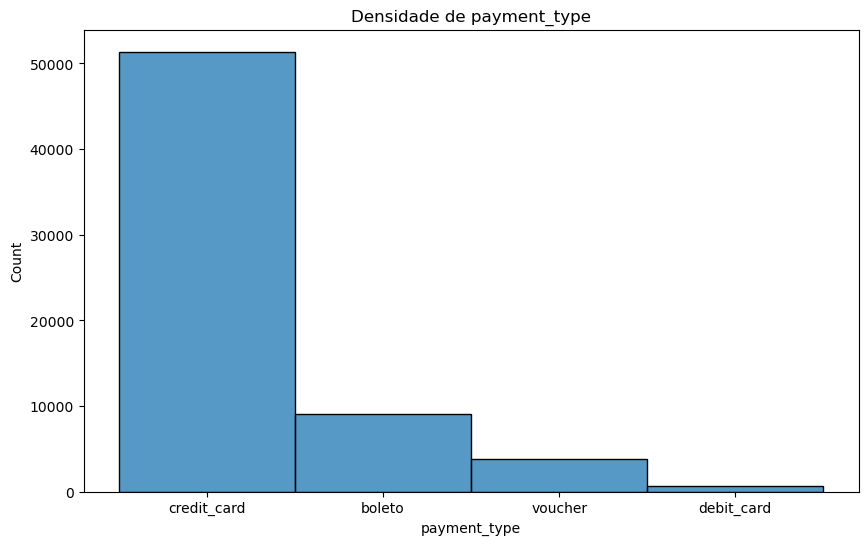

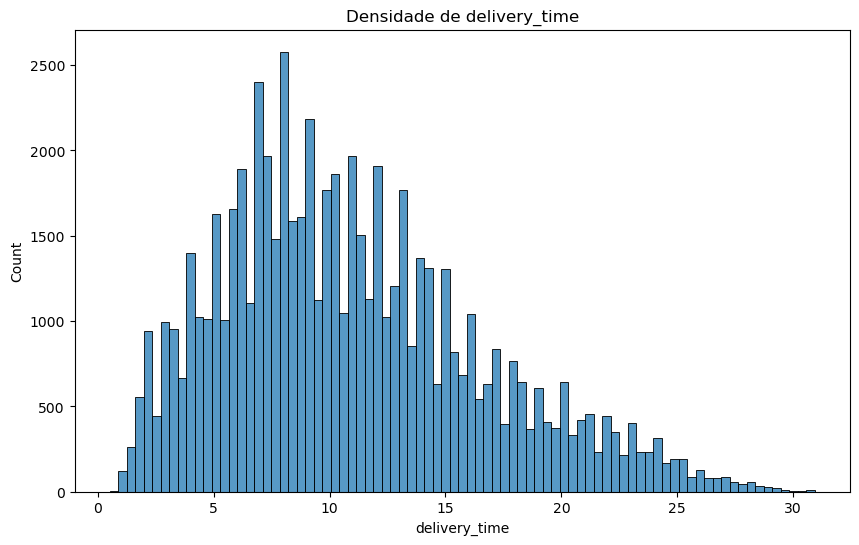

In [204]:
for coluna in df_analise:
    plt.figure(figsize=(10,6))
    sns.histplot(df[coluna])
    plt.title(f"Densidade de {coluna}")

In [205]:
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])

In [206]:
df["ANO"]=df["order_delivered_customer_date"].dt.year

In [207]:
df["ANO"].unique()



array([2017, 2018, 2016])

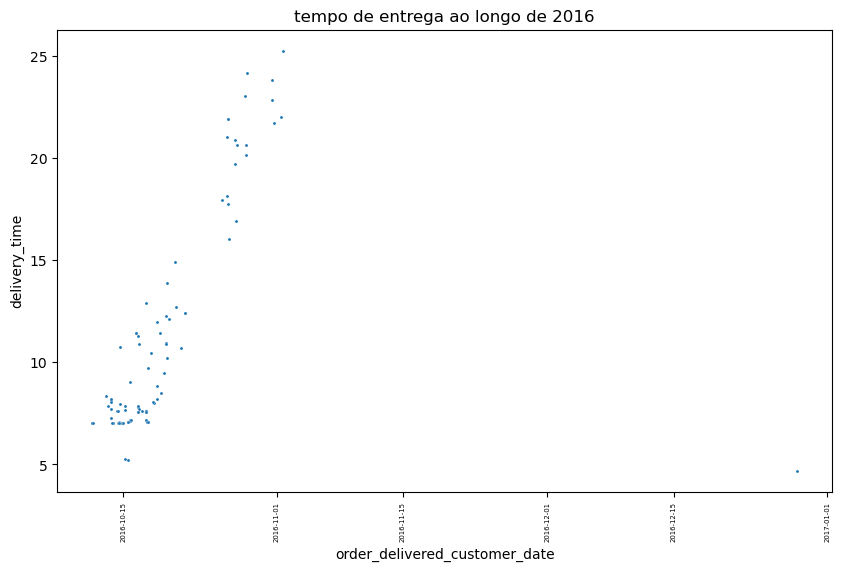

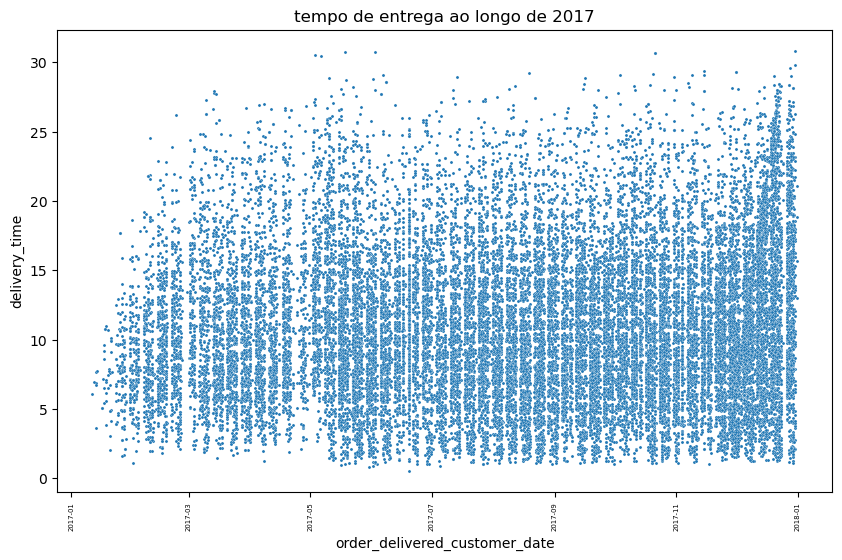

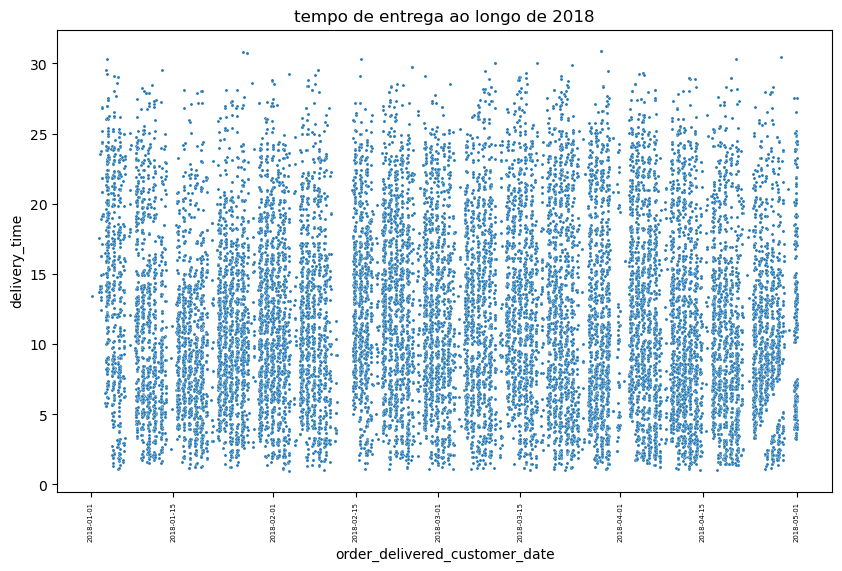

In [208]:

for ano in sorted(df["ANO"].unique()):
    df_ano=df[df["ANO"]==ano]
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_ano,x="order_delivered_customer_date",y="delivery_time",s=5)
    plt.xticks(rotation=90,fontsize=5)
    plt.title(f"tempo de entrega ao longo de {ano}")
    plt.show

In [209]:
df_ano=df[df["ANO"]==2016]

In [210]:
df_ano["order_delivered_customer_date"].dt.month.unique()

array([10, 11, 12])

In [211]:
df_ano=df[df["ANO"]==2017]

In [212]:
df_ano["order_delivered_customer_date"].dt.month.unique()

array([ 9,  5, 12,  8,  4, 10,  6,  2,  3, 11,  7,  1])

In [213]:
df_ano=df[df["ANO"]==2018]

In [214]:
df_ano["order_delivered_customer_date"].dt.month.unique()

array([1, 3, 2, 4])

In [215]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
Pedido em aprovação                 0
order_approved_at                   0
Separando o pedido                  0
order_delivered_carrier_date        0
Pedido em transporte                0
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1158
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
order_id.2  

order_purchase_timestamp            0
Pedido em aprovação                 0
order_approved_at                   0
Separando o pedido                  0
order_delivered_carrier_date        0
Pedido em transporte                0
order_delivered_customer_date       0


delivery_time                       0


product_category_name            1034
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_volume_cm3                  0

In [216]:
display(df)

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value,seller_first_digit,customer_first_digit,product_volume_cm3,ANO
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0000,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29,2,2,3528.0,2017
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0000,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87,3,3,14157.0,2018
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0000,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69,1,3,2880.0,2017
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0000,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85,0,1,2700.0,2017
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0000,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65,0,1,5760.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64873,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0000,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14,1,5,8000.0,2018
64874,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64878 entries, 0 to 64877
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       64878 non-null  object        
 1   customer_id                    64878 non-null  object        
 2   order_status                   64878 non-null  object        
 3   order_purchase_timestamp       64878 non-null  object        
 4   Pedido em aprovação            64878 non-null  float64       
 5   order_approved_at              64878 non-null  object        
 6   Separando o pedido             64878 non-null  float64       
 7   order_delivered_carrier_date   64878 non-null  object        
 8   Pedido em transporte           64878 non-null  float64       
 9   order_delivered_customer_date  64878 non-null  datetime64[ns]
 10  delivery_time                  64878 non-null  float64       
 11  delivery_time_m

In [218]:
df["order_approved_at"]=pd.to_datetime(df["order_approved_at"])
df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_carrier_date"]=pd.to_datetime(df["order_delivered_carrier_date"])

In [219]:
ped=df["order_purchase_timestamp"].dt.hour
apr=df["order_approved_at"].dt.hour
df.insert(4,"Horário do pedido",ped)
df.insert(7,"Horário da aprovação",apr)

In [220]:
display(df)

,order_id,customer_id,order_status,order_purchase_timestamp,Horário do pedido,Pedido em aprovação,order_approved_at,Horário da aprovação,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value,seller_first_digit,customer_first_digit,product_volume_cm3,ANO
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,8,0.03,2017-09-13 09:45:35,9,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0000,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29,2,2,3528.0,2017
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,14,0.01,2018-01-14 14:48:30,14,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0000,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87,3,3,14157.0,2018
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,21,1.26,2017-05-17 03:55:27,3,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0000,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69,1,3,2880.0,2017
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,11,0.01,2017-12-10 12:10:31,12,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0000,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85,0,1,2700.0,2017
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,18,1.00,2018-03-20 18:35:21,18,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0000,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65,0,1,5760.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64873,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,12,0.01,2018-03-17 12:29:22,12,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0000,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14,1,5,8000.0,2018
64874,fff90cdcb3b2e6cfb397d

<Axes: xlabel='Horário do pedido', ylabel='Count'>

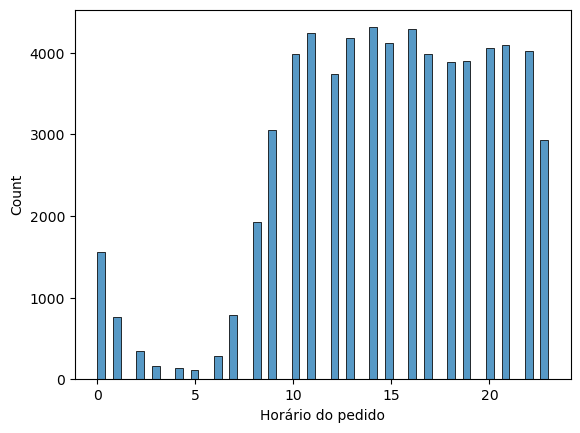

In [221]:
sns.histplot(df["Horário do pedido"])

<Axes: xlabel='Horário da aprovação', ylabel='Count'>

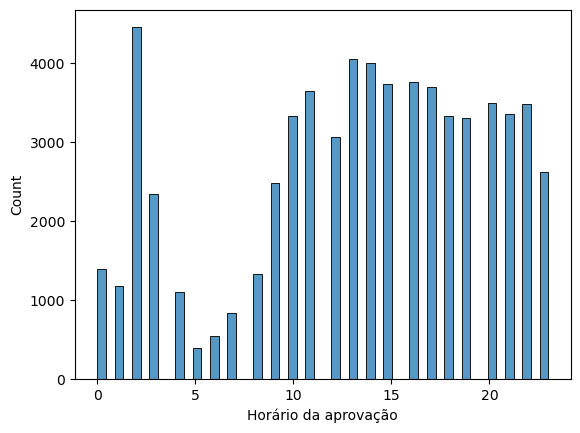

In [222]:
sns.histplot(df["Horário da aprovação"])

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


<Axes: xlabel='Horário do pedido', ylabel='delivery_time'>

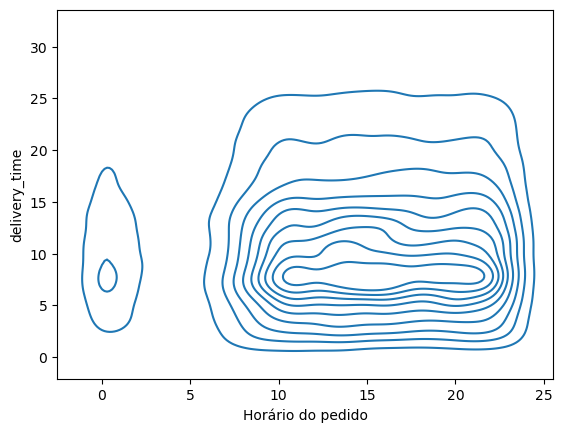

In [223]:
sns.kdeplot(data=df,x="Horário do pedido",y="delivery_time",s=0.5)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


<Axes: xlabel='Horário da aprovação', ylabel='delivery_time'>

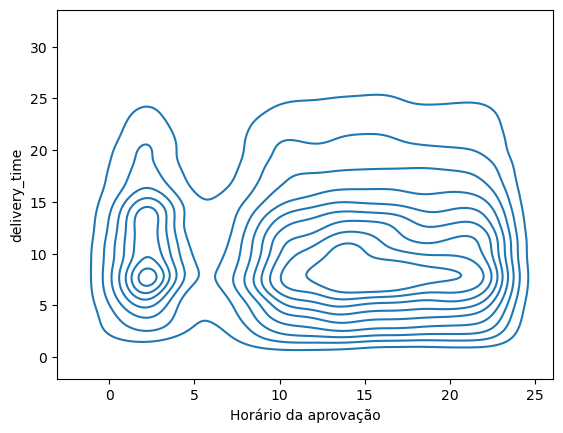

In [224]:
sns.kdeplot(data=df,x="Horário da aprovação",y="delivery_time",s=0.5)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64878 entries, 0 to 64877
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       64878 non-null  object        
 1   customer_id                    64878 non-null  object        
 2   order_status                   64878 non-null  object        
 3   order_purchase_timestamp       64878 non-null  datetime64[ns]
 4   Horário do pedido              64878 non-null  int32         
 5   Pedido em aprovação            64878 non-null  float64       
 6   order_approved_at              64878 non-null  datetime64[ns]
 7   Horário da aprovação           64878 non-null  int32         
 8   Separando o pedido             64878 non-null  float64       
 9   order_delivered_carrier_date   64878 non-null  datetime64[ns]
 10  Pedido em transporte           64878 non-null  float64       
 11  order_delivered

C:\Users\Dell\AppData\Local\Temp\ipykernel_8728\3519256266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qtd_data["Contador"]=1


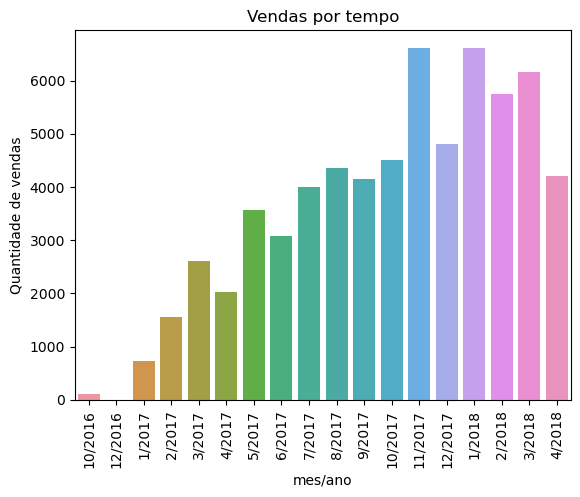

In [226]:
df["Mes do pedido"]=df["order_purchase_timestamp"].dt.month
df["Ano do pedido"]=df["order_purchase_timestamp"].dt.year


qtd_data=df[["Mes do pedido","Ano do pedido"]]
qtd_data["Contador"]=1

qtd_data=qtd_data.groupby(["Ano do pedido","Mes do pedido"],as_index=False)["Contador"].sum()

qtd_data["mes/ano"]=qtd_data["Mes do pedido"].astype(str)+"/"+qtd_data["Ano do pedido"].astype(str)
sns.barplot(data=qtd_data,x="mes/ano",y="Contador")
plt.xticks(rotation=90)
plt.ylabel("Quantidade de vendas")
plt.title("Vendas por tempo")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

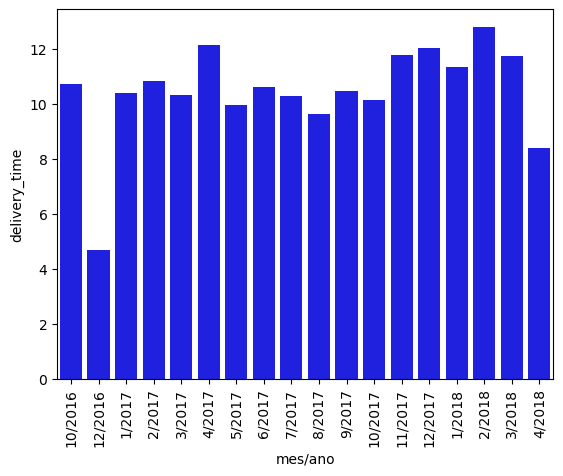

In [227]:

df_deltime=df[["Mes do pedido","Ano do pedido","delivery_time"]]

df_deltime=df_deltime.groupby(by=["Ano do pedido","Mes do pedido"],as_index=False)["delivery_time"].mean()
df_deltime["mes/ano"]=df_deltime["Mes do pedido"].astype(str)+"/"+df_deltime["Ano do pedido"].astype(str)

sns.barplot(data=df_deltime,x="mes/ano",y="delivery_time",color="blue")
plt.xticks(rotation=90)
plt.show

<Axes: xlabel='freight_value', ylabel='delivery_time'>

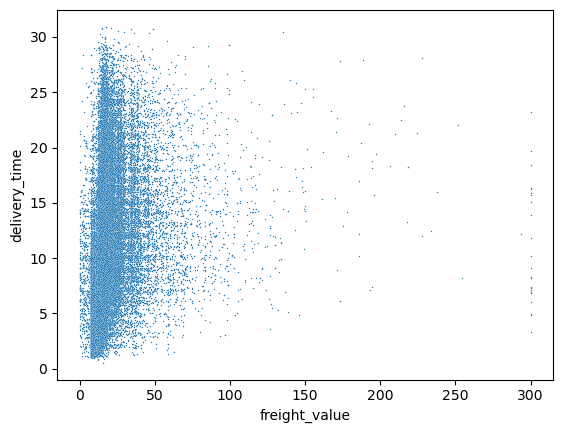

In [228]:
sns.scatterplot(data=df,x="freight_value",y="delivery_time",s=1)

## Análise de como o frete altera o delivery_time

In [229]:
df=pd.read_csv("Data/DE&CO_14_06.csv")
kaggle=pd.read_csv("Data/Kaggle_enriquecido.csv")

In [230]:
df.drop_duplicates(inplace=True)
df.dropna(subset=["order_id"],inplace=True)
df.drop(columns=["order_status","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty",
                 "product_weight_g","product_length_cm","product_height_cm","product_width_cm",'order_id.1',"payment_sequential","payment_type",
                 "payment_installments","customer_id.1","order_id.2","order_item_id","product_id.1","seller_id.1"], inplace=True)

kaggle.drop(columns=['product_category_name','product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                     "seller_state","shipping_limit_date"], inplace=True)

In [231]:
kaggle.describe()

,price,freight_value,customer_zip_code_prefix,seller_zip_code_prefix
count,27889.000000,27878.000000,28152.000000,28152.000000
mean,173.896697,29.097835,33954.572961,24334.139315
std,2954.894633,431.842443,29571.962196,27514.915116
min,0.850000,0.000000,1003.000000,1001.000000
25%,42.990000,13.050000,9617.750000,6097.000000
50%,79.900000,18.230000,22793.000000,13465.000000
75%,139.900000,23.210000,56200.000000,26379.000000
max,299990.000000,43820.000000,99980.000000,99730.000000


In [232]:
df[df["freight_value"]>175].describe()

,delivery_time,delivery_time_model,seller_zip_code_prefix,payment_value,customer_zip_code_prefix,price,freight_value
count,101.000000,101.000000,101.000000,101.000000,101.000000,99.000000,101.000000
mean,20.943861,31.034158,28729.336634,913.406535,53029.257426,733.112727,9152.251782
std,12.243173,8.531521,32473.234214,1104.889780,25180.945159,1087.174017,17088.154476
min,3.290000,11.230000,1026.000000,24.940000,2472.000000,10.250000,175.670000
25%,12.460000,26.300000,3929.000000,196.380000,30210.000000,129.900000,194.310000
50%,18.740000,29.220000,13324.000000,660.390000,58102.000000,460.000000,245.750000
75%,26.980000,34.590000,36504.000000,1093.520000,68515.000000,890.000000,16390.000000
max,86.000000,54.120000,95012.000000,6929.310000,99050.000000,6735.000000,108960.000000


In [233]:
kaggle[kaggle["freight_value"]>175].describe()

,price,freight_value,customer_zip_code_prefix,seller_zip_code_prefix
count,55.000000,55.000000,55.000000,55.000000
mean,903.396000,3913.328545,47952.981818,37186.436364
std,1150.633025,8985.334524,28757.056518,35090.762127
min,18.900000,175.550000,2307.000000,3908.000000
25%,172.495000,194.640000,23646.000000,8799.000000
50%,449.900000,234.780000,42701.000000,18030.000000
75%,1099.500000,330.200000,77536.000000,86049.500000
max,6729.000000,43820.000000,96010.000000,95034.000000


In [234]:
x=df[df["freight_value"]<330]
y=kaggle[kaggle["freight_value"]<330]

<Axes: xlabel='freight_value', ylabel='delivery_time'>

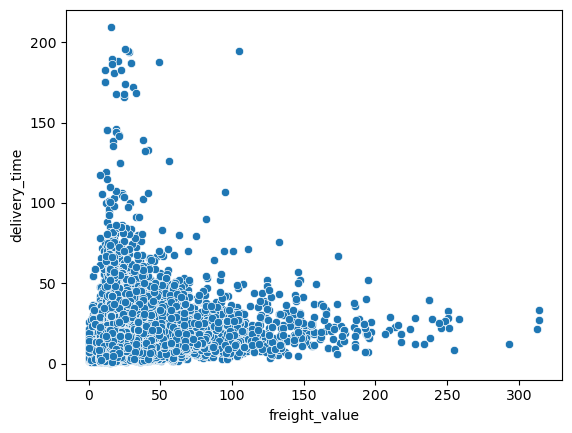

In [235]:
sns.scatterplot(data=x,x="freight_value",y="delivery_time")

In [236]:
x=df[df["freight_value"]>330]
y=kaggle[kaggle["freight_value"]>330]

<Axes: xlabel='freight_value', ylabel='delivery_time'>

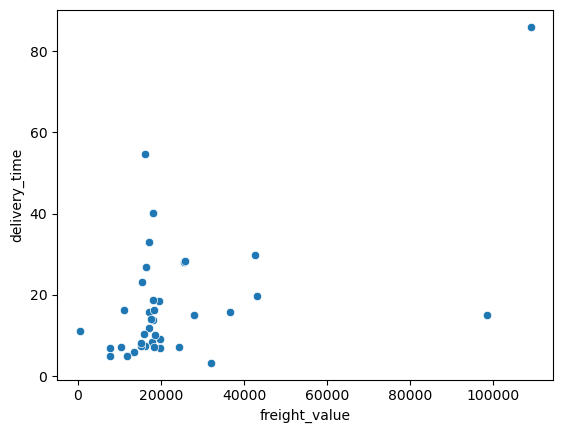

In [237]:
sns.scatterplot(data=x,x="freight_value",y="delivery_time")

In [238]:
df["freight_value"].describe()

count     81002.000000
mean         30.569107
std         681.575920
min           0.000000
25%          13.110000
50%          16.110000
75%          20.140000
max      108960.000000
Name: freight_value, dtype: float64

<Axes: xlabel='freight_value', ylabel='delivery_time'>

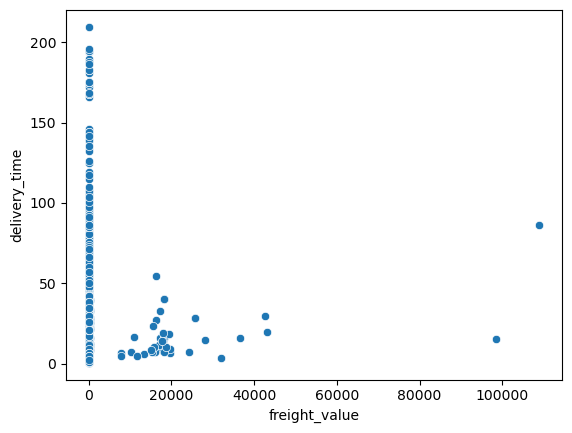

In [239]:
sns.scatterplot(data=df,x="freight_value",y="delivery_time")

In [240]:
df.loc[df["freight_value"]>300,"freight_value"]=30.5

In [241]:
df["freight_value"].describe()

count    81002.000000
mean        19.326180
std         14.123777
min          0.000000
25%         13.110000
50%         16.110000
75%         20.140000
max        293.270000
Name: freight_value, dtype: float64

<Axes: xlabel='freight_value', ylabel='delivery_time'>

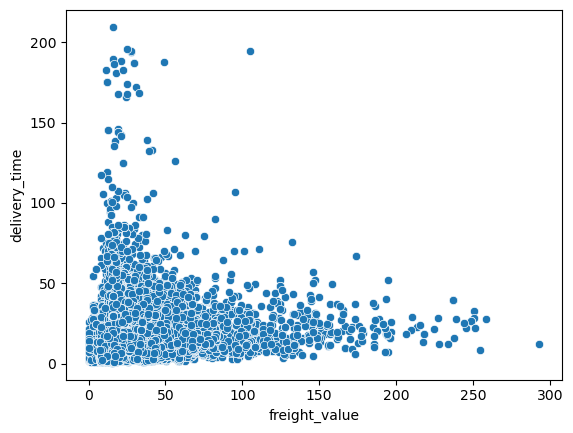

In [242]:
sns.scatterplot(data=df,x="freight_value",y="delivery_time")

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["freight_value"],ax=axs[0])
sns.histplot(df["delivery_time"],ax=axs[1])
plt.show()